# Importar bibliotecas necesarias:

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preprocesamiento de Datos:

In [91]:
file_path = "/content/apple_quality.csv"  # Ruta del archivo
df = pd.read_csv(file_path)

print("Primeras filas del dataset original:")
print(df.head())

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_columns] = df[numeric_columns].round(2)

print("\nDatos después de redondear a 6 decimales:")
print(df.head())

output_file = "/content/air_quality_health_impact_data.csv"
df.to_csv(output_file, index=False, float_format='%.2f')  # Guardar con 6 decimales

print(f"\nEl dataset transformado se ha guardado en: {output_file}")

Primeras filas del dataset original:
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  

Datos después de redondear a 6 decimales:
   A_id  Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.97   -2.51       5.35        -1.01       1.84      0.33   
1   1.0 -1.20   -2.84       3.66         1.59       0.85      0.87   
2   2.0 -0.29   -1.35      -1.74        -0.34       2.84     -0.04   
3   3.0 -0.66   -2.27      

In [92]:
# Cargar el conjunto de datos
file_path = "/content/apple_quality.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
display(df.head())

# Información general del dataset
display(df.info())

# Resumen estadístico de los datos numéricos
display(df.describe())

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


None

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [59]:
# Eliminar filas con valores nulos
df = df.dropna()

# Convertir 'Acidity' a tipo numérico
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

# Confirmar que no hay valores nulos después de la limpieza
df.isnull().sum()

<ipython-input-59-9718bbc6f855>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')


,0
A_id,0
Size,0
Weight,0
Sweetness,0
Crunchiness,0
Juiciness,0
Ripeness,0
Acidity,0
Quality,0


# Análisis Exploratorio:

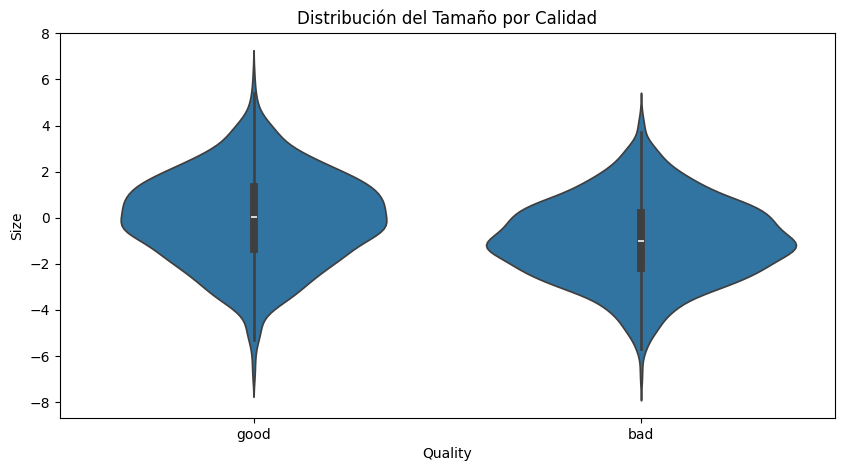

In [60]:
# 1) ¿Existe una correlación entre el tamaño de la manzana y su calidad?
plt.figure(figsize=(10,5))
sns.violinplot(x='Quality', y='Size', data=df)
plt.title('Distribución del Tamaño por Calidad')
plt.show()

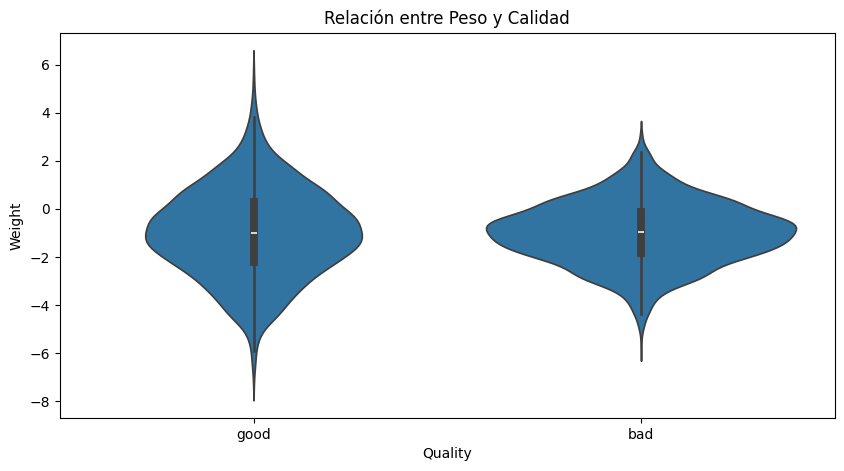

In [61]:
# 2) ¿El peso de la manzana influye en su calidad?
plt.figure(figsize=(10,5))
sns.violinplot(x='Quality', y='Weight', data=df)
plt.title('Relación entre Peso y Calidad')
plt.show()

# Grafico Disperción

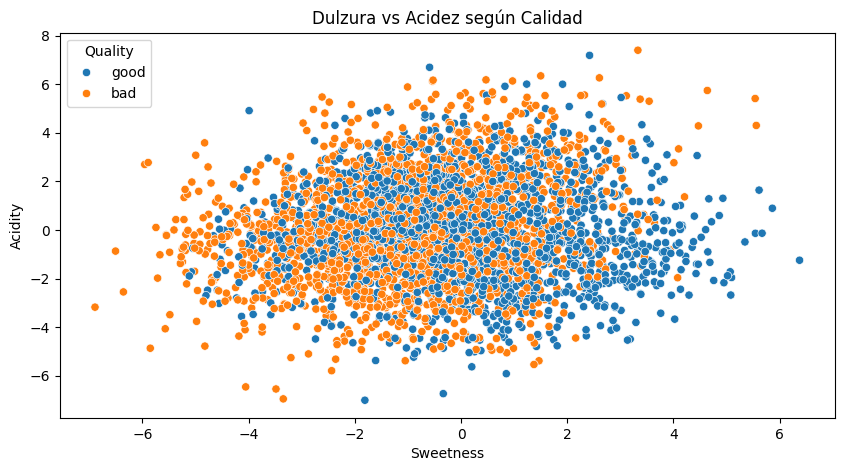

In [62]:
# 3) ¿La dulzura y la acidez están relacionadas con la calidad de la manzana?
plt.figure(figsize=(10,5))
sns.scatterplot(x='Sweetness', y='Acidity', hue='Quality', data=df)
plt.title('Dulzura vs Acidez según Calidad')
plt.show()

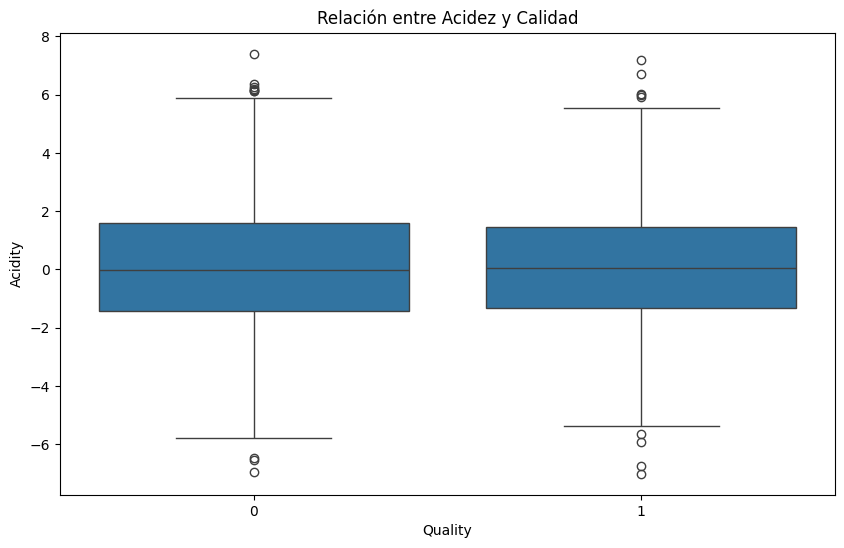

In [85]:
# 4. Correlación entre acidez y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality', y='Acidity', data=df)
plt.title('Relación entre Acidez y Calidad')
plt.show()

# Gráfico de pastel:

1. Muestra la distribución de las calidades (Quality) en un conjunto de datos almacenado en un DataFrame (df). Aquí tienes un resumen de su funcionalidad y utilidad:

2. Funcionalidad:
- Conteo de frecuencias:
- valores_calidad = df['Quality'].value_counts():
- Extrae la columna Quality del DataFrame df.
- Cuenta cuántas veces aparece cada valor único en esa columna.
- El resultado es una serie donde los índices son los valores únicos de Quality (por ejemplo, "Buena", "Regular", "Mala") y los valores son sus respectivos conteos.

3. Creación del gráfico de pastel: plt.pie():
-Toma los valores de conteo (valores_calidad.values) y las etiquetas correspondientes (valores_calidad.index).
- autopct='%1.1f%%' muestra el porcentaje de cada porción en el gráfico.
startangle=90 gira el gráfico para que comience desde la parte superior.
- plt.title() añade un título al gráfico.
- plt.axis('equal') asegura que el gráfico sea un círculo perfecto.

4. Visualización:
plt.show() abre una ventana con el gráfico de pastel generado.

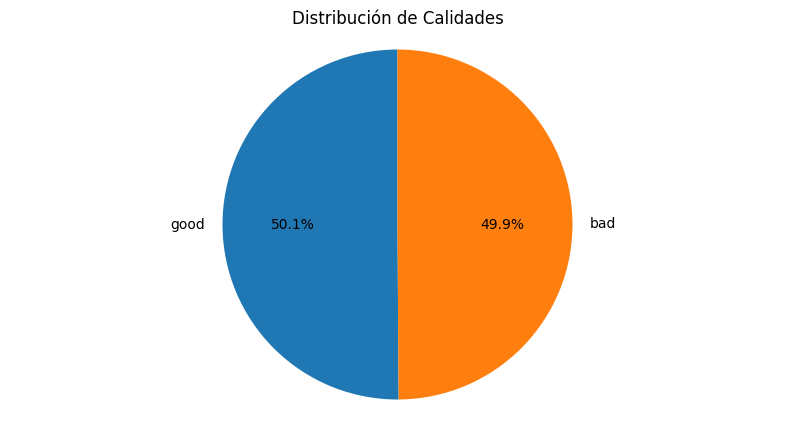

In [98]:
# Visualización de Acidez: Grafico Pastel

import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar los datos por 'Quality' y contar las frecuencias
valores_calidad = df['Quality'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 5))
plt.pie(valores_calidad.values,
        labels=valores_calidad.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribución de Calidades')
plt.axis('equal')  # Para que el círculo sea redondo
plt.show()

# Graficos Histogramas Dulzura y acidez por ID Manzanas



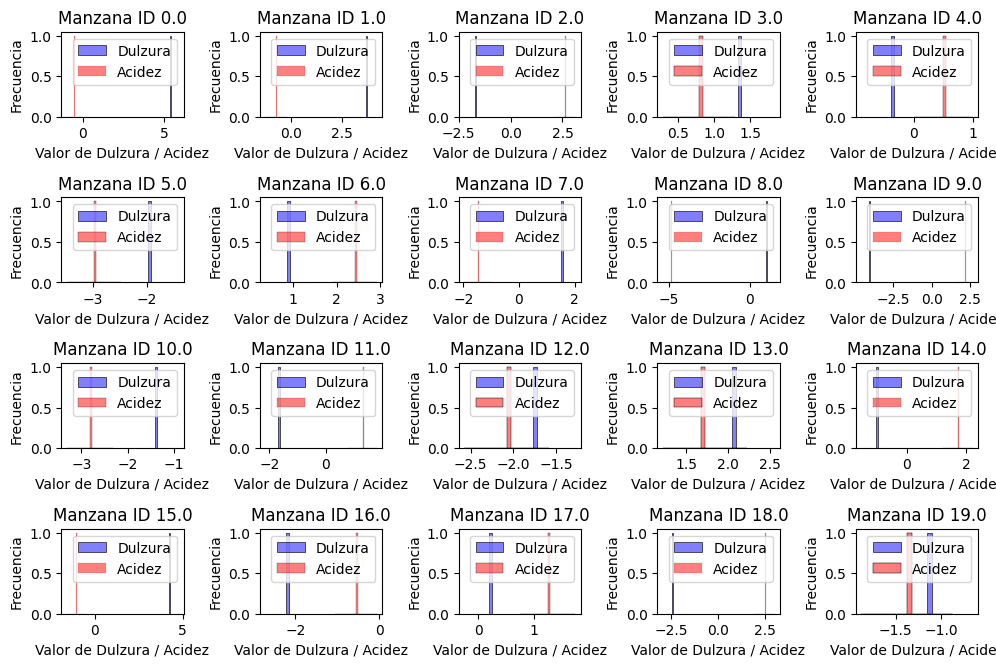

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar los primeros 10 IDs de manzanas
first_20_ids = df['A_id'].unique()[:20]

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear un histograma 5x5 para los primeros 10 IDs de manzanas
for i, apple_id in enumerate(first_20_ids, 1):
    plt.subplot(5, 5, i)
    sns.histplot(data=df[df['A_id'] == apple_id], x='Sweetness', kde=True, bins=20, color='blue', alpha=0.5, label='Dulzura')
    sns.histplot(data=df[df['A_id'] == apple_id], x='Acidity', kde=True, bins=20, color='red', alpha=0.5, label='Acidez')
    plt.title(f'Manzana ID {apple_id}')
    plt.xlabel('Valor de Dulzura / Acidez')
    plt.ylabel('Frecuencia')
    plt.legend()

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

# Modelado y Evaluación:
 Random Forest (Bosque Aleatorio) para clasificación.

1. Crea un modelo de Random Forest:
- RandomForestClassifier: Es un algoritmo de aprendizaje supervisado que combina múltiples árboles de decisión para mejorar la precisión y evitar el sobreajuste.

- n_estimators=200: Indica que se crearán 200 árboles de decisión en el bosque.

- max_depth=10: Limita la profundidad máxima de cada árbol a 10 niveles, lo que ayuda a controlar la complejidad del modelo.

- random_state=42: Fija una semilla para garantizar que los resultados sean reproducibles.

2. Entrena el modelo:
model.fit(X_train, y_train): Utiliza los datos de entrenamiento (X_train para las características y y_train para las etiquetas) para entrenar el modelo. El modelo aprende a predecir las etiquetas (y_train) en función de las características (X_train).

3. Este código entrena un modelo de clasificación basado en Random Forest con 200 árboles, una profundidad máxima de 10 y una semilla fija para reproducibilidad, utilizando los datos de entrenamiento proporcionados.

In [72]:
# Eliminar filas con valores nulos
df = df.dropna()

# Convertir 'Acidity' a tipo numérico
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

# Convertir la columna 'Quality' a valores binarios
df['Quality'] = df['Quality'].map({'bad': 0, 'good': 1})

# Eliminar la columna identificadora
df = df.drop(columns=['A_id'])

# Separar características (X) y etiquetas (y)
X = df.drop(columns=['Quality'])
y = df['Quality']

# Dividir el dataset en entrenamiento y prueba (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-72-08f31c6696b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
<ipython-input-72-08f31c6696b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quality'] = df['Quality'].map({'bad': 0, 'good': 1})


In [45]:
# Entrenar un modelo de Random Forest
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [21]:
# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}') # Formato decimal

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2%}')  # Formato porcentil

Precisión del modelo: 0.87
Precisión del modelo: 86.62%


#  Matriz De Confusión:
Es una herramienta útil para evaluar el rendimiento de un modelo de clasificación. Aquí te explico paso a paso lo que hace:

1. Calcula la matriz de confusión:
- confusion_matrix(y_test, y_pred): Compara las etiquetas reales (y_test) con las etiquetas predichas por el modelo (y_pred). La matriz de confusión muestra cuántas predicciones fueron correctas y cuántas fueron incorrectas, desglosadas por clase.

2. Visualiza la matriz de confusión:
- sns.heatmap(): Utiliza la biblioteca Seaborn para crear un mapa de calor que representa la matriz de confusión de manera visual.
- annot=True: Muestra los valores numéricos dentro de cada celda de la matriz.
fmt='d': Formatea los números como enteros.
- cmap='Blues': Usa una escala de colores azules para el mapa de calor.

3. Personaliza la visualización:
- plt.title('Matriz de Confusión'): Añade un título al gráfico.
- plt.xlabel('Predicción'): Etiqueta el eje X como "Predicción", que representa las clases predichas por el modelo.
- plt.ylabel('Real'): Etiqueta el eje Y como "Real", que representa las clases verdaderas (etiquetas reales).

4. Muestra el gráfico:
plt.show(): Muestra la matriz de confusión en una ventana gráfica.

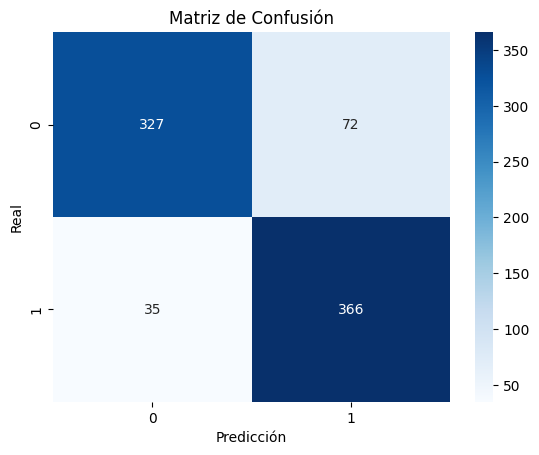

In [22]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [71]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       399
           1       0.84      0.91      0.87       401

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



#Importancia de las características en un modelo de Random Forest.:

1. Obtiene la importancia de las características:
- model.feature_importances_: Extrae la importancia de cada característica (variable) utilizada en el modelo de Random Forest.
- Esto indica cuánto contribuye cada característica a la predicción del modelo.

2. Prepara los nombres de las características:
- feature_names = X.columns: Obtiene los nombres de las columnas (características) del conjunto de datos X, que se utilizaron para entrenar el modelo.

3. Visualiza la importancia de las características:
- plt.figure(figsize=(10,6)): Crea una figura con un tamaño específico (10x6 pulgadas) para la visualización.
- sns.barplot(): Utiliza la biblioteca Seaborn para crear un gráfico de barras.
- x=feature_importances: Representa la importancia de las características en el eje X.
- y=feature_names: Representa los nombres de las características en el eje Y.
- plt.title('Importancia de las Características'): Añade un título al gráfico.
- plt.show(): Muestra el gráfico en una ventana.

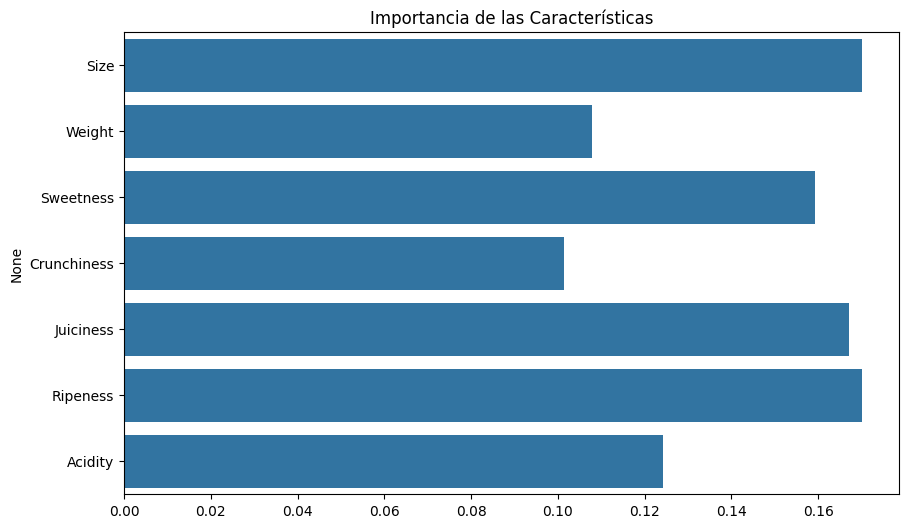

In [23]:
# Importancia de las características
feature_importances = model.feature_importances_
feature_names = X.columns

# Visualizar importancia de características
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Importancia de las Características')
plt.show()

# Código Para Evaluar El Modelo:
Aquí se imprimen los valores de las métricas calculadas:

1. MSE: Se imprime con dos decimales.
2. RMSE: Se imprime con dos decimales.
3. MAE: Se imprime con dos decimales.
4. R²: Se imprime con dos decimales.

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')


Error Cuadrático Medio (MSE): 0.13
Raíz del Error Cuadrático Medio (RMSE): 0.37
Error Absoluto Medio (MAE): 0.13
Coeficiente de Determinación (R²): 0.46


# Gráfico de radar que visualiza las métricas de evaluación de un modelo de regresión.

- Cada métrica se representa en un eje radial,
- Los valores normalizados se conectan para formar un polígono.

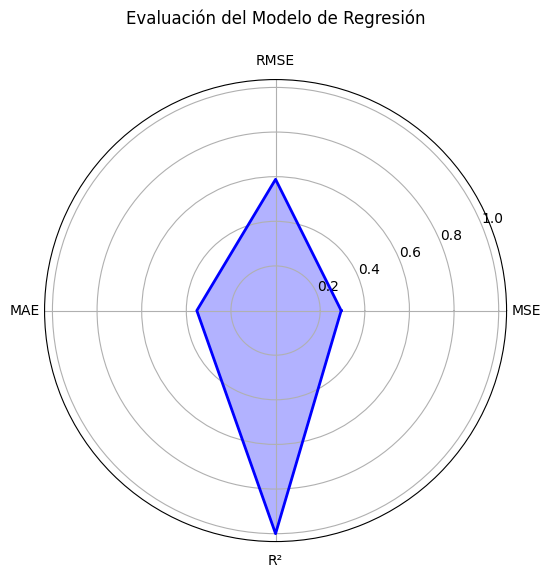

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las métricas de evaluación del modelo
metrics = {
    "MSE": 0.25,   # Error Cuadrático Medio
    "RMSE": 0.50,  # Raíz del Error Cuadrático Medio
    "MAE": 0.30,   # Error Absoluto Medio
    "R²": 0.85     # Coeficiente de Determinación
}

# Convertir los valores a una lista
labels = list(metrics.keys())
values = list(metrics.values())

# Normalizar los valores entre 0 y 1 para mejor visualización
max_value = max(values)
values_normalized = [v / max_value for v in values]

# Crear el gráfico de radar
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values_normalized += values_normalized[:1]  # Cerrar el gráfico
angles += angles[:1]  # Cerrar el gráfico

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar el área del radar
ax.fill(angles, values_normalized, color='blue', alpha=0.3)
ax.plot(angles, values_normalized, color='blue', linewidth=2)  # Contorno

# Configurar etiquetas
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Título con espacio extra
plt.title("Evaluación del Modelo de Regresión", pad=40)  # Se agrega padding

# Mostrar gráfico
plt.show()